# Exploring differences in word frequencies used between corpuses

## Graphs and visuals

Lets generate some visualizations showing which words are more likely to show up in each corpus, as well as find ones that tend to be more prominent in only one

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from sklearn.feature_extraction import text

In [2]:
fn_df = pd.read_csv("./firstnames.csv")
ln_df = pd.read_csv("./censusSurnames.csv")

In [3]:
# Add names to stop words
name_list = fn_df["firstname"].tolist() + ln_df["surname"].tolist()
test = CountVectorizer(stop_words="english")
test1 = test.fit_transform(name_list)
word_list = test.get_feature_names_out()
name_stop_words = word_list.tolist()
STOP_WORDS = list(text.ENGLISH_STOP_WORDS.union(name_stop_words))

In [4]:
# Build a dictionary of all the words in the documents used in the "Black-or-African-American" folder
# mapping each word to the number of times it was seen.
# ex.
# print(b_word_freq) # prints a dict showing that the word abdominal appeared 410 times
# { ..., 'abdominal': 410, ...}
folder_location = os.path.join("documents", "Black-or-African-American")
docs = []
for filename in os.listdir(folder_location):
    f = os.path.join(folder_location, filename)
    # checking if it is a file
    if os.path.isfile(f):
        docs.append(open(f))
cv = CountVectorizer(input="file", stop_words=STOP_WORDS)
cv_fit = cv.fit_transform(docs)
word_list = cv.get_feature_names_out()
count_list = cv_fit.toarray().sum(axis=0)

for fh in docs:
    fh.close()

b_word_freq = dict(zip(word_list, count_list))

In [5]:
# Build a dictionary of all the words in the documents used in the "White-or-Caucasian" folder
folder_location = os.path.join("documents", "White-or-Caucasian")
docs = []
for filename in os.listdir(folder_location):
    f = os.path.join(folder_location, filename)
    # checking if it is a file
    if os.path.isfile(f):
        docs.append(open(f))
cv = CountVectorizer(input="file", stop_words=STOP_WORDS)
cv_fit = cv.fit_transform(docs)
word_list = cv.get_feature_names_out()
count_list = cv_fit.toarray().sum(axis=0)

for fh in docs:
    fh.close()

w_word_freq = dict(zip(word_list, count_list))

[Text(0.5, 1.0, 'w word freq')]

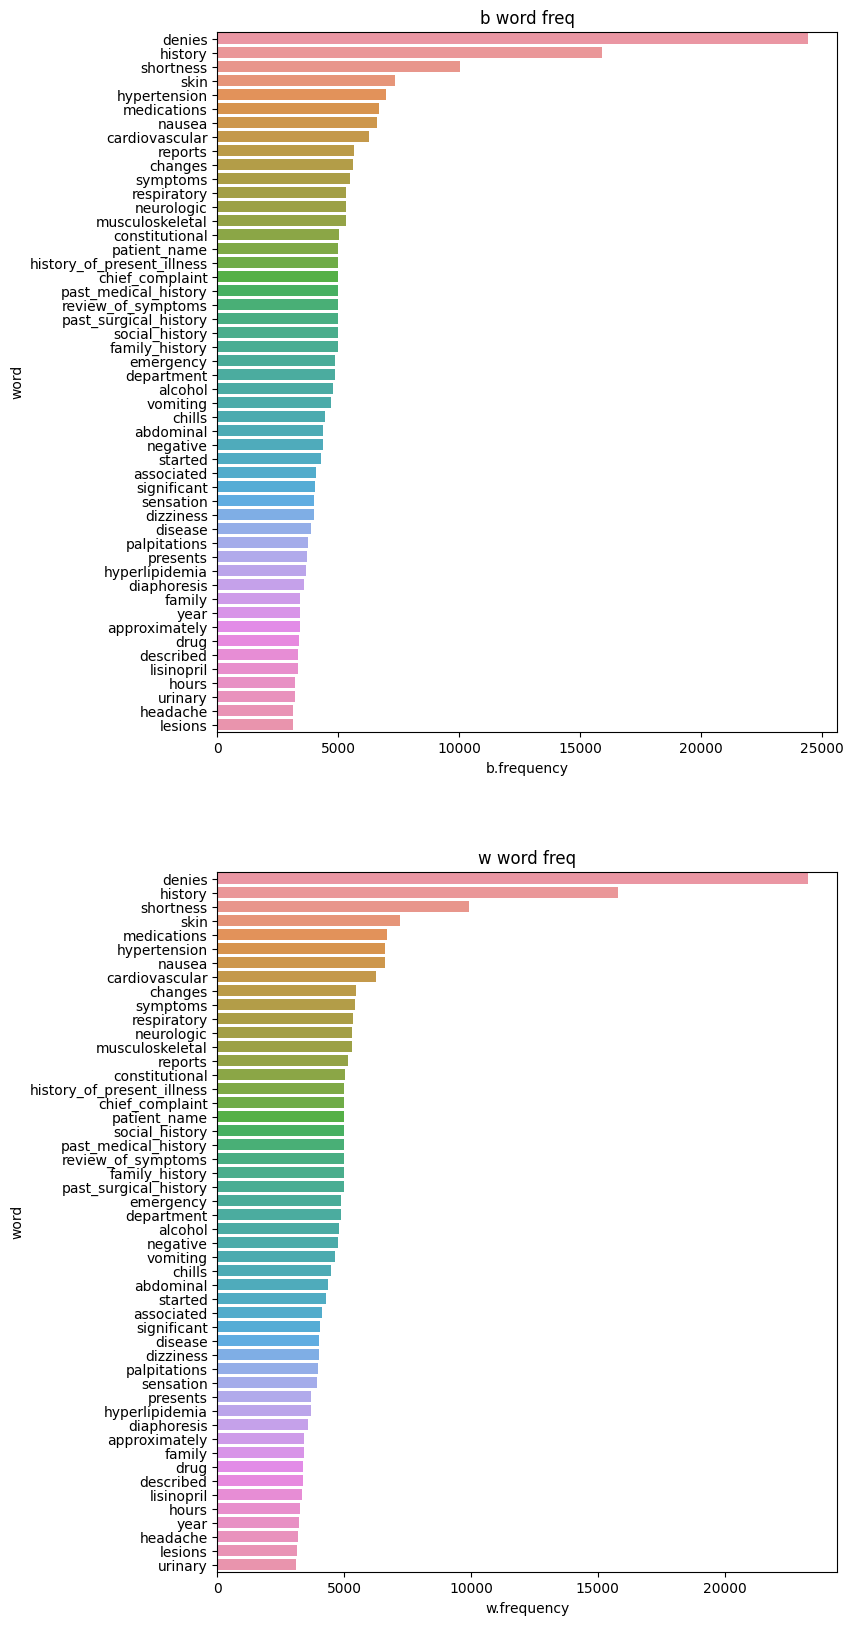

In [6]:
# Quick plot to see which words are used most in each data set
b_word_freq_df = pd.DataFrame(
    b_word_freq.items(), columns=["word", "b.frequency"]
).sort_values(by="b.frequency", ascending=False)
w_word_freq_df = pd.DataFrame(
    w_word_freq.items(), columns=["word", "w.frequency"]
).sort_values(by="w.frequency", ascending=False)
fig, axes = plt.subplots(2, 1, figsize=(8, 20))
sns.barplot(ax=axes[0], x="b.frequency", y="word", data=b_word_freq_df.head(50)).set(
    title="b word freq"
)
sns.barplot(ax=axes[1], x="w.frequency", y="word", data=w_word_freq_df.head(50)).set(
    title="w word freq"
)

In [7]:
# Inner join the b and w tables on words to combine freq between both tables
wf_df = w_word_freq_df.merge(b_word_freq_df, how="inner", on="word")

In [8]:
# We don't want to sort on the most common freq for w vs b especially if the frequencies are similar, instead we care about where these frequencies differ
# Create a new column that calculates the difference in freq of words between datasets and sort by the diff
wf_df["w.frequency_pct"] = wf_df["w.frequency"] / wf_df["w.frequency"].sum()
wf_df["b.frequency_pct"] = wf_df["b.frequency"] / wf_df["b.frequency"].sum()
wf_df["frequency_pct_diff"] = wf_df["b.frequency_pct"] - wf_df["w.frequency_pct"]
wf_df["frequency_pct_diff_abs"] = wf_df["frequency_pct_diff"].abs()
# Sort by largest values in absolue difference
wf_df.sort_values(by="frequency_pct_diff", ascending=False).head(10)

,word,w.frequency,b.frequency,w.frequency_pct,b.frequency_pct,frequency_pct_diff,frequency_pct_diff_abs
0,denies,23282,24433,0.054046,0.056335,0.002289,0.002289
13,reports,5153,5666,0.011962,0.013064,0.001102,0.001102
5,hypertension,6619,6956,0.015365,0.016038,0.000673,0.000673
80,mr,1430,1629,0.003320,0.003756,0.000436,0.000436
46,year,3211,3413,0.007454,0.007869,0.000415,0.000415
49,urinary,3080,3229,0.007150,0.007445,0.000295,0.000295
72,female,1615,1739,0.003749,0.004010,0.000261,0.000261
113,medication,818,930,0.001899,0.002144,0.000245,0.000245
8,changes,5476,5615,0.012712,0.012947,0.000235,0.000235
3,skin,7202,7349,0.016719,0.016945,0.000226,0.000226


In [9]:
# There are a lot of numbers in the notes. lets look at the spread between corpuses
mask = wf_df["word"].str.isnumeric()
nums_df = (
    wf_df[mask]
    .sort_values(by="frequency_pct_diff_abs", ascending=False)
    .sort_values(by="frequency_pct_diff", ascending=False)
)
aa_chart_data = []
ca_chart_data = []
for row in nums_df.iterrows():
    if row[1]["w.frequency_pct"] > row[1]["b.frequency_pct"]:
        # orange bars
        aa_chart_data.append(row[1]["word"])
    else:
        # blue bars
        ca_chart_data.append(row[1]["word"])

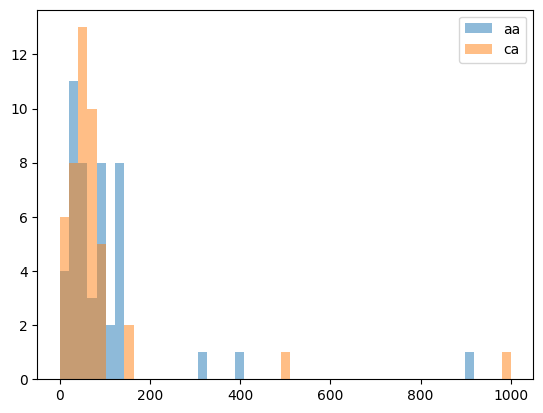

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import random
import numpy
from matplotlib import pyplot

x = [int(x) for x in aa_chart_data]
y = [int(x) for x in ca_chart_data]

bins = numpy.linspace(0, 1000)

pyplot.hist(x, bins, alpha=0.5, label="aa")
pyplot.hist(y, bins, alpha=0.5, label="ca")
pyplot.legend(loc="upper right")
pyplot.show()

In [11]:
# First order frequencies by magnature of difference (absolute value), take the top 200 words with the greatest difference,
# then re-sort by actual difference so when we plot the values will be sequential from smallest to largest bars
most = (
    wf_df.sort_values(by="frequency_pct_diff_abs", ascending=False)
    .head(200)
    .sort_values(by="frequency_pct_diff", ascending=False)
)

chart_data = {}

# Create a map with the word as the frequency, and the magnitude vector as the value\
# a vector of [0, n] will plot a blue bar
# a vector of [n, 0] will plot an orange bar
# a vector with a negative n [-n, 0] will plot a bar on the left
# a vector with a positive n [n, 0] will plot a bar on the right
# {"word": [-1, 0]} will plot an orange bar for "word" on the left of 0 with length 1
# {"word": [0, 0.5]} will plot a blue bar for "word" on the right of 0 with length 0.5
# in order to generate a good Positive Negative bar chart, we assign b freq to the left side (negative)
# and w freq to the right side (positive)
for row in most.iterrows():
    if row[1]["w.frequency_pct"] > row[1]["b.frequency_pct"]:
        # orange bars
        chart_data[row[1]["word"]] = [
            row[1]["w.frequency_pct"] - row[1]["b.frequency_pct"],
            0,
        ]
    else:
        # blue bars
        chart_data[row[1]["word"]] = [
            0,
            -(row[1]["b.frequency_pct"] - row[1]["w.frequency_pct"]),
        ]

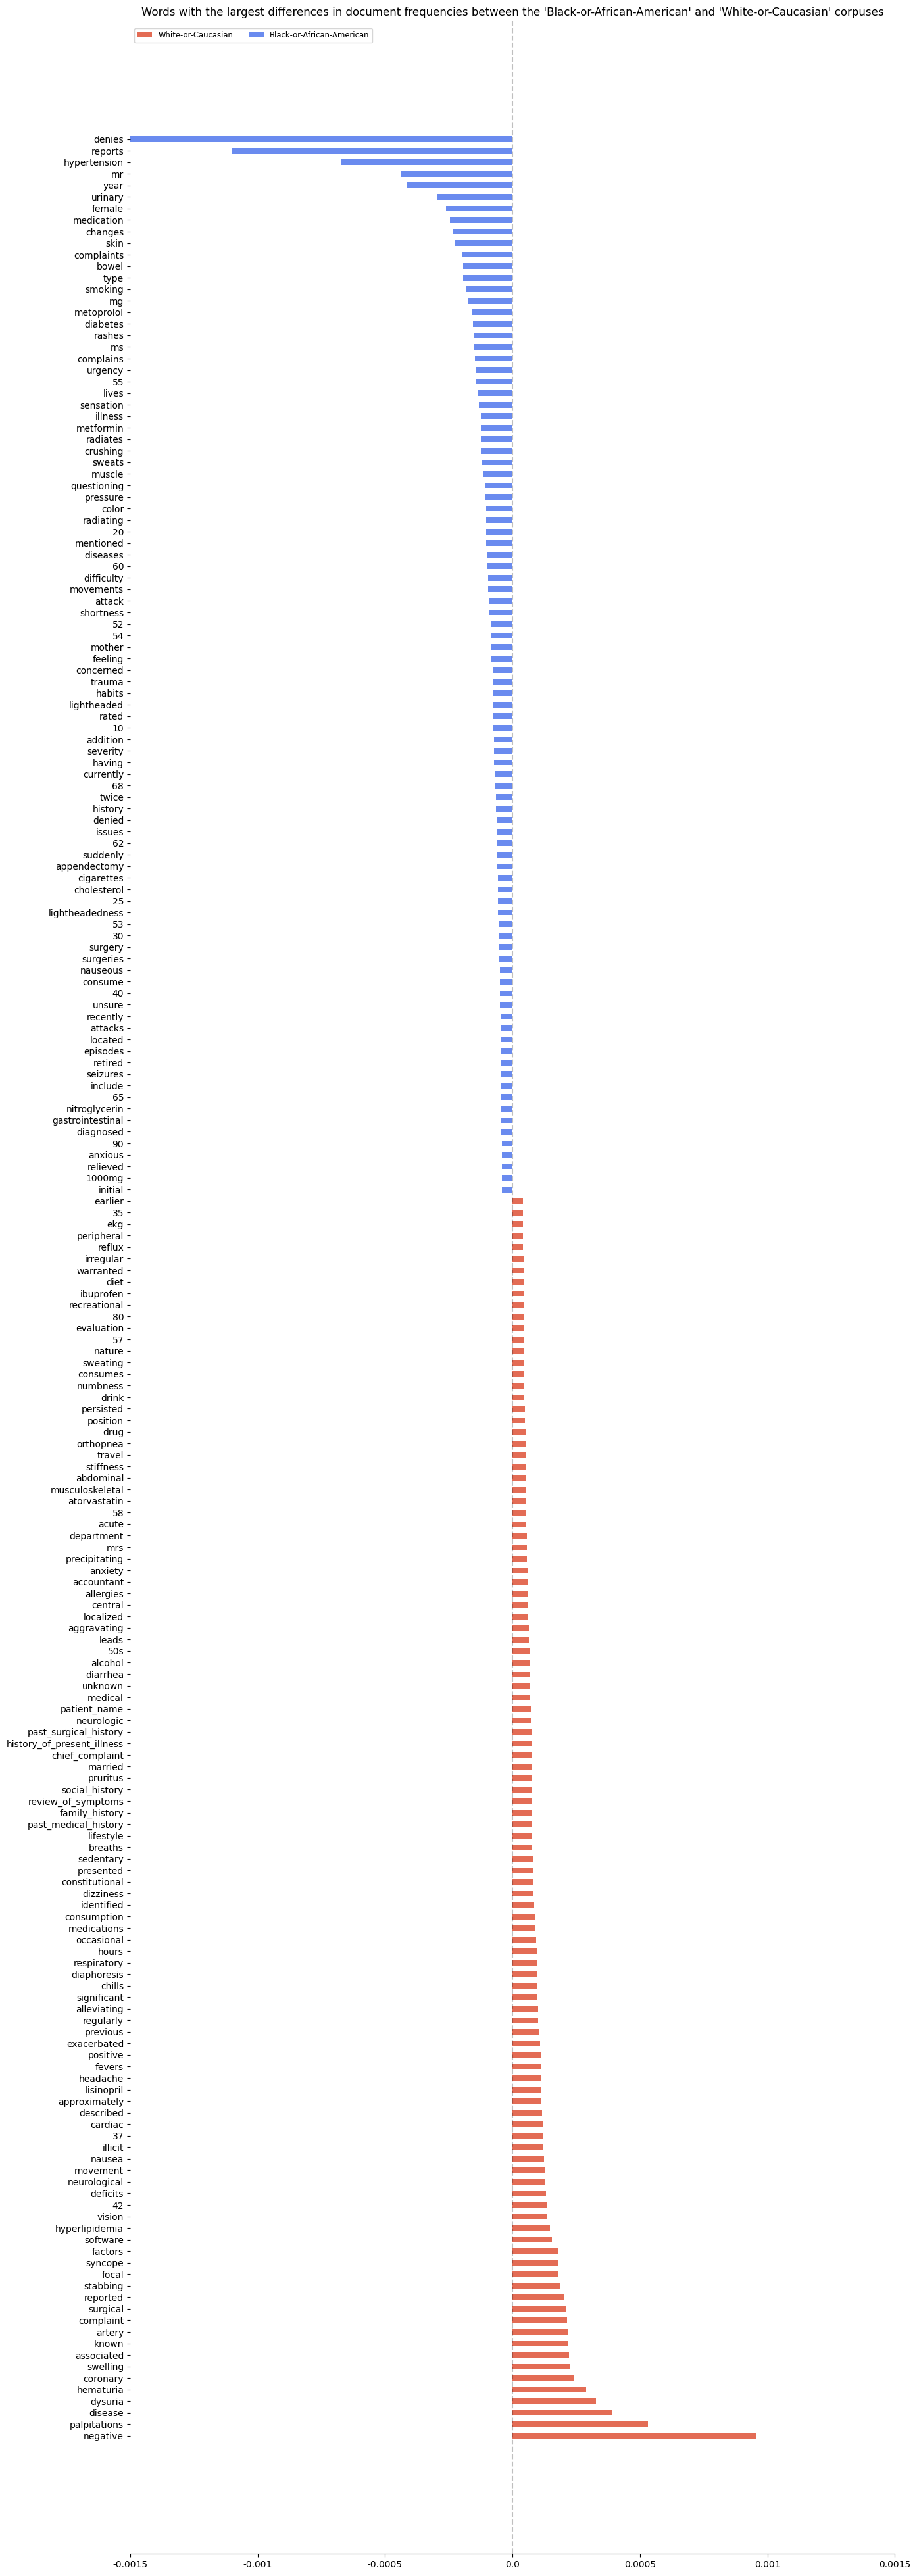

In [12]:
# Positive Negative Bar Chart to better visualize where word frequencies diverge between data sets
# Based on https://stackoverflow.com/a/69976552/11407943
import numpy as np
import matplotlib.pyplot as plt


category_names = ["White-or-Caucasian", "Black-or-African-American"]
results = chart_data


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*. The order is assumed
        to be from 'Strongly disagree' to 'Strongly aisagree'
    category_names : list of str
        The category labels.
    """

    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    middle_index = data.shape[1] // 2
    offsets = 0  # data[:, range(middle_index)].sum(axis=1) # + data[:, middle_index]/2

    # Color Mapping
    category_colors = plt.get_cmap("coolwarm_r")(np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(15, 50))

    # Plot Bars
    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths - offsets
        rects = ax.barh(
            labels, widths, left=starts, height=0.5, label=colname, color=color
        )

    # Add Zero Reference Line
    ax.axvline(0, linestyle="--", color="black", alpha=0.25)

    # X Axis
    ax.set_xlim(-0.0015, 0.0015)
    # ax.set_xticks(np.arange(-0.0035, 0.0035, 0.003))
    ax.xaxis.set_major_formatter(lambda x, pos: str(x))

    # Y Axis
    ax.invert_yaxis()

    # Remove spines
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["left"].set_visible(False)

    # Ledgend
    ax.legend(
        ncol=len(category_names),
        bbox_to_anchor=(0, 0.99),
        loc="lower left",
        fontsize="small",
    )

    # Set Background Color
    fig.set_facecolor("#FFFFFF")

    return fig, ax


fig, ax = survey(results, category_names)
plt.title(
    "Words with the largest differences in document frequencies between the 'Black-or-African-American' and 'White-or-Caucasian' corpuses"
)
plt.show()

In [13]:
most

,word,w.frequency,b.frequency,w.frequency_pct,b.frequency_pct,frequency_pct_diff,frequency_pct_diff_abs
0,denies,23282,24433,0.054046,0.056335,0.002289,0.002289
13,reports,5153,5666,0.011962,0.013064,0.001102,0.001102
5,hypertension,6619,6956,0.015365,0.016038,0.000673,0.000673
80,mr,1430,1629,0.003320,0.003756,0.000436,0.000436
46,year,3211,3413,0.007454,0.007869,0.000415,0.000415
...,...,...,...,...,...,...,...
69,hematuria,1706,1592,0.003960,0.003671,-0.000290,0.000290
56,dysuria,2659,2535,0.006173,0.005845,-0.000328,0.000328
33,disease,4007,3864,0.009302,0.008909,-0.000393,0.000393
35,palpitations,3961,3758,0.009195,0.008665,-0.000530,0.000530


In [14]:
len(docs)

5000

# T-test (independent)

In [15]:
# Note that we're removing stop words, which may influence our stats
folder_location = os.path.join("documents", "Black-or-African-American")
b_docs = []
for filename in os.listdir(folder_location):
    f = os.path.join(folder_location, filename)
    # checking if it is a file
    if os.path.isfile(f):
        with open(f) as doc:
            cv = CountVectorizer(input="file", stop_words=STOP_WORDS)
            cv_fit = cv.fit_transform([doc])
            word_list = cv.get_feature_names_out()
            count_list = cv_fit.toarray().sum(axis=0)
            b_word_freq = dict(zip(word_list, count_list))
            b_docs.append(b_word_freq)

In [16]:
folder_location = os.path.join("documents", "White-or-Caucasian")
w_docs = []
for filename in os.listdir(folder_location):
    f = os.path.join(folder_location, filename)
    # checking if it is a file
    if os.path.isfile(f):
        with open(f) as doc:
            cv = CountVectorizer(input="file", stop_words=STOP_WORDS)
            cv_fit = cv.fit_transform([doc])
            word_list = cv.get_feature_names_out()
            count_list = cv_fit.toarray().sum(axis=0)
            b_word_freq = dict(zip(word_list, count_list))
            w_docs.append(b_word_freq)

In [17]:
def run_test_on_word(word):
    b_freq_list_htn = []
    w_freq_list_htn = []
    for doc in b_docs:
        b_freq_list_htn.append(doc.get(word, 0) / sum(doc.values()))

    for doc in w_docs:
        w_freq_list_htn.append(doc.get(word, 0) / sum(doc.values()))
    # Non paired T-test, two individual groups
    test_result = scipy.stats.ttest_ind(b_freq_list_htn, w_freq_list_htn)
    return test_result

In [18]:
class bcolors:
    HEADER = "\033[95m"
    OKBLUE = "\033[94m"
    OKCYAN = "\033[96m"
    OKGREEN = "\033[92m"
    WARNING = "\033[93m"
    FAIL = "\033[91m"
    ENDC = "\033[0m"
    BOLD = "\033[1m"
    UNDERLINE = "\033[4m"


word_list = (
    wf_df.sort_values(by="frequency_pct_diff_abs", ascending=False).sort_values(
        by="frequency_pct_diff", ascending=False
    )
)["word"].tolist()
sig_count = 0
for word in word_list:
    if run_test_on_word(word).pvalue < 0.01:
        print(
            f'There is a significant difference in the frequency of the word "{word}" with a p-value of {bcolors.OKGREEN + "{:0.3f}".format(run_test_on_word(word).pvalue)}'
            + bcolors.ENDC
        )
        sig_count = sig_count + 1
    elif run_test_on_word(word).pvalue < 0.05:
        print(
            f'There is a significant difference in the frequency of the word "{word}" with a p-value of {"{:0.3f}".format(run_test_on_word(word).pvalue)}'
        )
        sig_count = sig_count + 1
print(len(word_list))
print(sig_count)

There is a significant difference in the frequency of the word "denies" with a p-value of 0.003
There is a significant difference in the frequency of the word "reports" with a p-value of 0.000
There is a significant difference in the frequency of the word "hypertension" with a p-value of 0.007
There is a significant difference in the frequency of the word "mr" with a p-value of 0.028
There is a significant difference in the frequency of the word "year" with a p-value of 0.001
There is a significant difference in the frequency of the word "female" with a p-value of 0.005
There is a significant difference in the frequency of the word "medication" with a p-value of 0.049
There is a significant difference in the frequency of the word "type" with a p-value of 0.030
There is a significant difference in the frequency of the word "diabetes" with a p-value of 0.036
There is a significant difference in the frequency of the word "complains" with a p-value of 0.020
There is a significant differenc

# Notable words with significant differences in frequency 

### Medical conditions
There is a significant difference in the frequency of the word "hypertension" with a p-value of 0.000
There is a significant difference in the frequency of the word "hyperlipidemia" with a p-value of 0.001
There is a significant difference in the frequency of the word "thrombosis" with a p-value of 0.024
There is a significant difference in the frequency of the word "osteoarthritis" with a p-value of 0.029
There is a significant difference in the frequency of the word "hypertensive" with a p-value of 0.031
There is a significant difference in the frequency of the word "diabetes" with a p-value of 0.043

### Medications
There is a significant difference in the frequency of the word "statin" with a p-value of 0.002
There is a significant difference in the frequency of the word "levothyroxine" with a p-value of 0.007
There is a significant difference in the frequency of the word "amlodipine" with a p-value of 0.035

### Demographics
There is a significant difference in the frequency of the word "married" with a p-value of 0.000
There is a significant difference in the frequency of the word "female" with a p-value of 0.001
There is a significant difference in the frequency of the word "mother" with a p-value of 0.001

More frequency of the conditions hypertension, hyperlipidemia, and hypertension drugs (amlodipine). Also more usage of mother, sister, and female. Need to check if there is a bias in name generation or the underlying census dataset.

# These results are just for exploratory analysis

![significant](https://imgs.xkcd.com/comics/significant.png)